In [92]:
# ! pip install ucimlrepo

https://github.com/uci-ml-repo/ucimlrepo

In [93]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [94]:
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = X.select_dtypes(exclude="object").columns.tolist()

In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)
X_trans = preprocess.fit_transform(X)
y_num = (y == "yes").astype(int)
# Necesitamos los nombres de las features tras el One-Hot Encoding
feature_names = preprocess.get_feature_names_out()
# Creamos el DataFrame de entrada
df = pd.DataFrame(X_trans, columns=feature_names, index=X.index)

# Añadimos la columna objetivo numérica
df["y"] = y_num.values  # o simplemente y_num si comparten índice

In [96]:

%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split


# Partial Dependence Plots

In [97]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:1000][feature_names],
    df.iloc[:1000]["y"],    
    test_size=0.2,  # 20% for testing
    random_state=123,
)

# Fit model by default
model = RandomForestClassifier(random_state=123)
model.fit(X_train, y_train)

# Evaluate model using R squared
score = model.score(X_test, y_test)
score

0.98

In [98]:
feature_names

array(['cat__job_admin.', 'cat__job_blue-collar', 'cat__job_entrepreneur',
       'cat__job_housemaid', 'cat__job_management', 'cat__job_retired',
       'cat__job_self-employed', 'cat__job_services', 'cat__job_student',
       'cat__job_technician', 'cat__job_unemployed', 'cat__job_nan',
       'cat__marital_divorced', 'cat__marital_married',
       'cat__marital_single', 'cat__education_primary',
       'cat__education_secondary', 'cat__education_tertiary',
       'cat__education_nan', 'cat__default_no', 'cat__default_yes',
       'cat__housing_no', 'cat__housing_yes', 'cat__loan_no',
       'cat__loan_yes', 'cat__contact_cellular', 'cat__contact_telephone',
       'cat__contact_nan', 'cat__month_apr', 'cat__month_aug',
       'cat__month_dec', 'cat__month_feb', 'cat__month_jan',
       'cat__month_jul', 'cat__month_jun', 'cat__month_mar',
       'cat__month_may', 'cat__month_nov', 'cat__month_oct',
       'cat__month_sep', 'cat__poutcome_failure', 'cat__poutcome_other',
       'cat_

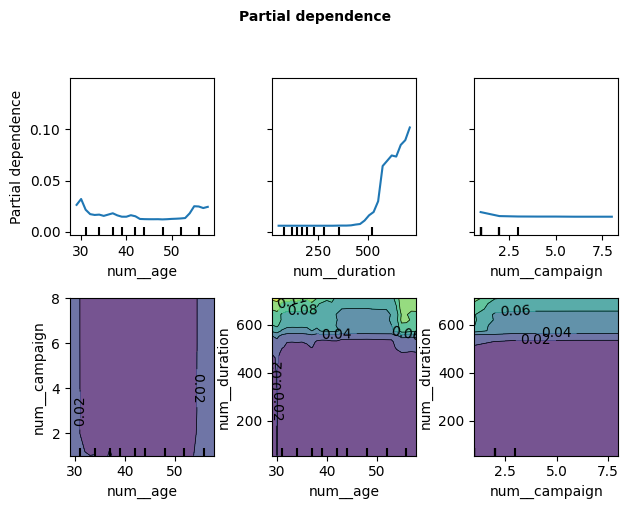

In [99]:
# Create the partial dependence display
pdp = PartialDependenceDisplay.from_estimator(model, 
                                              X_train, 
                                              features = ["num__age", "num__duration", "num__campaign", 
                                                          ("num__age", "num__campaign"), ("num__age", "num__duration"), ("num__campaign", "num__duration")], 
                                              grid_resolution=30)

pdp.figure_.subplots_adjust(wspace=0.4, hspace=0.4)

plt.suptitle("Partial dependence", y=1.05, fontsize=10, fontweight='bold')

plt.tight_layout()

# Lime para datos tabulares

In [100]:
# ! pip install scikit-image

In [101]:
# ! pip install lime

In [102]:
# ! pip install keras

In [103]:
# ! pip install tensorflow

In [104]:
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular

# Entrenar un clasificador de bosque aleatorio
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train.values, y_train)

# Crear un explainer de LIME para datos tabulares
explainer = lime_tabular.LimeTabularExplainer(X_train.values, 
                                              feature_names=X_train.columns, 
                                              class_names=['no', 'yes'],
                                              mode='classification')

# Explicar la instancia
exp = explainer.explain_instance(X_test.iloc[1].values, clf.predict_proba, num_features=4, labels=[0,1])
exp1 = explainer.explain_instance(X_test.iloc[2].values, clf.predict_proba, num_features=4, labels=[0,1])
exp2 = explainer.explain_instance(X_test.iloc[3].values, clf.predict_proba, num_features=4, labels=[0,1])
exp3 = explainer.explain_instance(X_test.iloc[4].values, clf.predict_proba, num_features=4, labels=[0,1])
exp4 = explainer.explain_instance(X_test.iloc[5].values, clf.predict_proba, num_features=4, labels=[0,1])

In [105]:
for i in range (1, 6, 1):
    print("Predicción del modelo para la instancia:", clf.predict([X_test.iloc[i].values])[0])
    print(clf.predict_proba(X_test.iloc[i].values.reshape(1, -1)))

Predicción del modelo para la instancia: 0
[[0.99 0.01]]
Predicción del modelo para la instancia: 0
[[0.99 0.01]]
Predicción del modelo para la instancia: 0
[[1. 0.]]
Predicción del modelo para la instancia: 0
[[0.99 0.01]]
Predicción del modelo para la instancia: 0
[[1. 0.]]


In [106]:
# exp.show_in_notebook(show_table=True)
from IPython.display import display, HTML
display(HTML(exp.as_html(show_table=True)))
display(HTML(exp1.as_html(show_table=True)))
display(HTML(exp2.as_html(show_table=True)))
display(HTML(exp3.as_html(show_table=True)))
display(HTML(exp4.as_html(show_table=True)))

In [107]:
for i in range (1, 6, 1):
    print(X_test.iloc[i])
    print("--------------------------------")

cat__job_admin.               0.0
cat__job_blue-collar          0.0
cat__job_entrepreneur         0.0
cat__job_housemaid            0.0
cat__job_management           0.0
cat__job_retired              0.0
cat__job_self-employed        0.0
cat__job_services             0.0
cat__job_student              1.0
cat__job_technician           0.0
cat__job_unemployed           0.0
cat__job_nan                  0.0
cat__marital_divorced         0.0
cat__marital_married          0.0
cat__marital_single           1.0
cat__education_primary        0.0
cat__education_secondary      0.0
cat__education_tertiary       0.0
cat__education_nan            1.0
cat__default_no               1.0
cat__default_yes              0.0
cat__housing_no               0.0
cat__housing_yes              1.0
cat__loan_no                  1.0
cat__loan_yes                 0.0
cat__contact_cellular         0.0
cat__contact_telephone        0.0
cat__contact_nan              1.0
cat__month_apr                0.0
cat__month_aug

In [108]:
print(exp.as_list())
print("--------------------------------")
print(exp1.as_list())
print("--------------------------------")
print(exp2.as_list())
print("--------------------------------")
print(exp3.as_list())
print("--------------------------------")
print(exp4.as_list())

[('num__duration > 311.25', 0.07527107063990547), ('cat__job_admin. <= 0.00', -0.026134496975529945), ('cat__job_technician <= 0.00', -0.01724619158917133), ('cat__job_blue-collar <= 0.00', 0.010539985448858164)]
--------------------------------
[('num__balance > 450.75', 0.028338029763980716), ('198.00 < num__duration <= 311.25', -0.025197358217290515), ('cat__job_admin. <= 0.00', -0.023750343353598956), ('0.00 < cat__education_secondary <= 1.00', 0.011329923120462758)]
--------------------------------
[('130.00 < num__duration <= 198.00', -0.024482139484096936), ('cat__job_admin. <= 0.00', -0.020926231017414854), ('0.00 < cat__job_blue-collar <= 1.00', -0.011413157530192055), ('cat__education_secondary <= 0.00', -0.0102117245195496)]
--------------------------------
[('num__duration > 311.25', 0.07370810130235482), ('num__balance > 450.75', 0.02868807313051411), ('cat__job_admin. <= 0.00', -0.021261454289018614), ('0.00 < cat__education_secondary <= 1.00', 0.01049786788723799)]
-----

# SHAP

In [ ]:
# ! pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 5.0 MB/s  0:00:00

   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   ---------------------------------------- 3/3 [shap]



In [110]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

In [114]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[i,:,1], X_test.iloc[1].values, feature_names=feature_names)

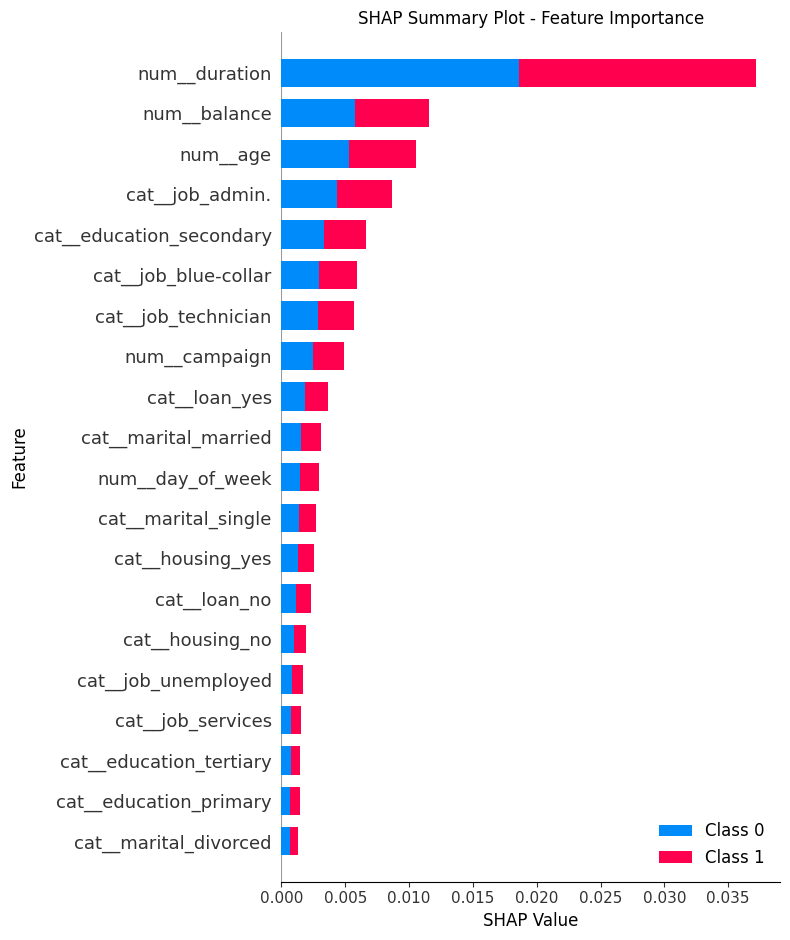

In [115]:
# Create a summary plot with the bar plot type
shap_values = explainer.shap_values(X_train)

# Bug en paquete shap, setiembre 2024
ensured_list_shap_values = [shap_values[:,:,i] for i in range(shap_values.shape[2])]
shap.summary_plot(ensured_list_shap_values, X_train, plot_type='bar', show=False)

# explainer = shap.Explainer(clf)
# shap_values = explainer(X_test)
# ax = shap.plots.bar(shap_values[:,:,0],show=False)


# Customize the plot appearance
plt.title("SHAP Summary Plot - Feature Importance")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

In [116]:
explainer_a = shap.Explainer(clf)
shap_values_cat = explainer_a(X_test)

In [117]:
shap_values_cat.shape

(200, 51, 2)

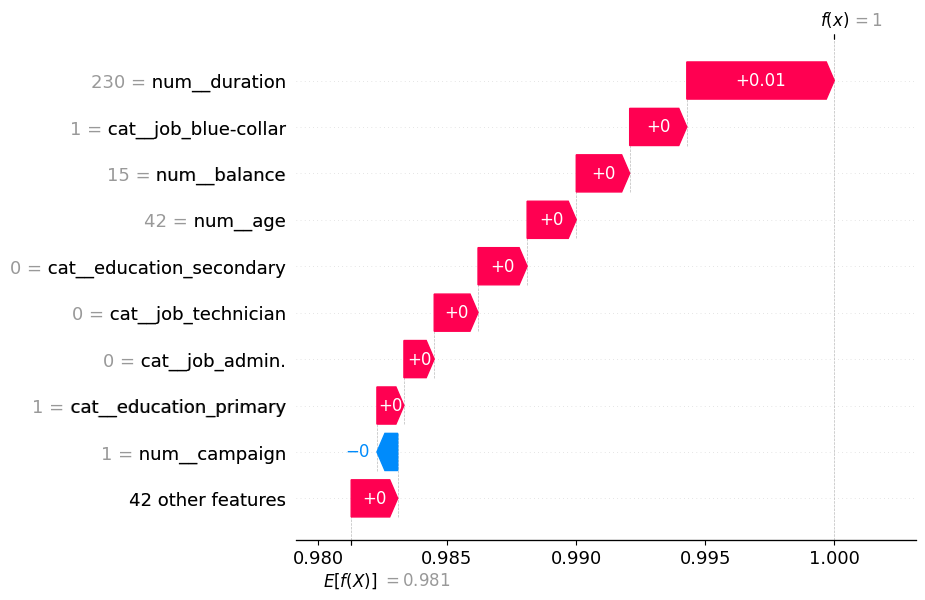

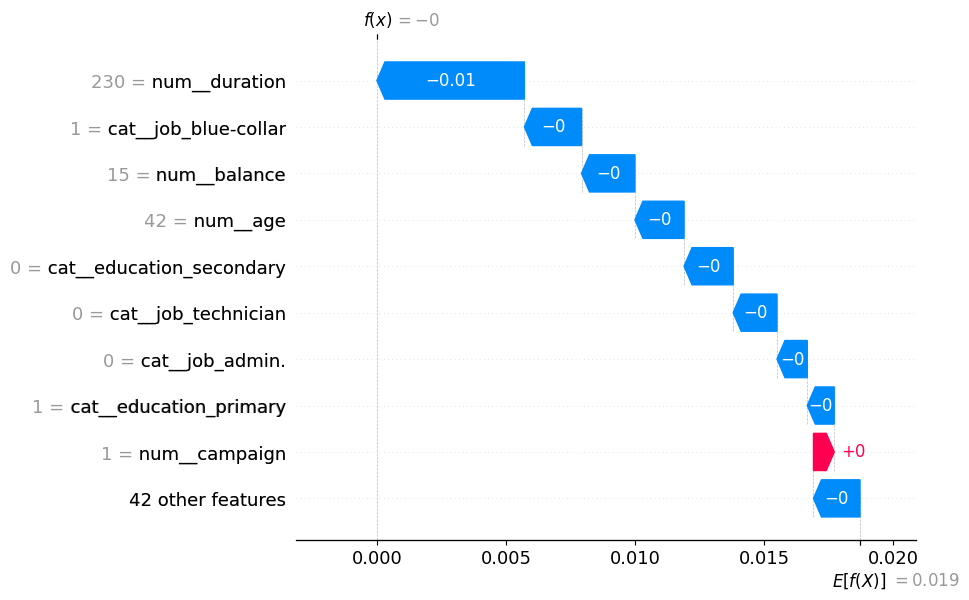

In [119]:
shap.plots.waterfall(shap_values_cat[i,:,0])
shap.plots.waterfall(shap_values_cat[i,:,1])